In [215]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as mlt
import seaborn as sns

In [216]:
Test = pd.read_csv("test.csv")
Train = pd.read_csv("train.csv")

In [217]:
print(Train.shape)
Train.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [218]:
Train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [219]:
Baseline = 342/(342+549)
Baseline

0.3838383838383838

In [220]:
print(Test.shape)
Test.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [221]:
Train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [222]:
Train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [223]:
Test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [224]:
def impute_age(col):
    Age = col[0]
    pclass = col[1]
    
    if(pd.isnull(Age)):
        if(pclass ==1):
            return 38
        elif(pclass ==2):
            return 29
        else:
            return 24
    else:return Age
 
        
        
        
    
    
        

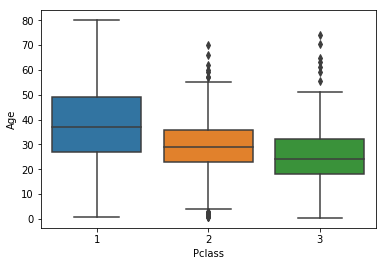

In [225]:
sns.boxplot(x=Train['Pclass'],y=Train['Age'])

In [226]:
Train['Age'] = Train[['Age','Pclass']].apply(impute_age,axis=1)
Test['Age'] = Test[['Age','Pclass']].apply(impute_age,axis=1)

In [227]:
Train.drop('Name',axis=1,inplace=True)
Test.drop('Name',axis=1,inplace=True)

In [228]:
Train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S


In [229]:
Test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S


In [230]:
Test[Test['Fare'].isnull()].Fare

152   NaN
Name: Fare, dtype: float64

In [231]:
Test.loc[152,'Fare'] =7.75

In [232]:
Test.shape

(418, 10)

In [233]:
Test[(Test['Age']>60) & (Test['Pclass']==3) & (Test['Sex']=='male')]

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,male,60.5,0,0,3701,7.75,NaN,S


In [234]:
Train.drop('Cabin',axis=1,inplace=True)
Test.drop('Cabin',axis=1,inplace=True)

In [235]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [236]:
Test.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [237]:
Train = Train.dropna()

In [238]:
Train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [239]:
Train_gender = pd.get_dummies(Train['Sex'],drop_first=True)
Test_gender = pd.get_dummies(Test['Sex'],drop_first=True)

Train_Embarked = pd.get_dummies(Train['Embarked'],drop_first=True)
Test_Embarked = pd.get_dummies(Test['Embarked'],drop_first=True)


In [240]:
Train.drop(['Sex','Embarked'],axis=1,inplace=True)
Test.drop(['Sex','Embarked'],axis=1,inplace=True)

In [241]:
Train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Ticket,Fare
0,1,0,3,22.0,1,0,A/5 21171,7.2500
1,2,1,1,38.0,1,0,PC 17599,71.2833
2,3,1,3,26.0,0,0,STON/O2. 3101282,7.9250
3,4,1,1,35.0,1,0,113803,53.1000
4,5,0,3,35.0,0,0,373450,8.0500


In [242]:
Test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare
0,892,3,34.5,0,0,330911,7.8292
1,893,3,47.0,1,0,363272,7.0000
2,894,2,62.0,0,0,240276,9.6875
3,895,3,27.0,0,0,315154,8.6625
4,896,3,22.0,1,1,3101298,12.2875


In [243]:
Train = pd.concat([Train,Train_gender,Train_Embarked],axis=1)
Train.drop('Ticket',axis=1,inplace=True)

In [244]:
Train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [245]:
Test = pd.concat([Test,Test_gender,Test_Embarked],axis=1)
Test.drop('Ticket',axis=1,inplace=True)

In [246]:
Test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [247]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [248]:
Test= Test.apply(pd.to_numeric)

In [249]:
Test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Fare           418 non-null float64
male           418 non-null uint8
Q              418 non-null uint8
S              418 non-null uint8
dtypes: float64(2), int64(4), uint8(3)
memory usage: 20.9 KB


In [250]:
Test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


In [251]:
Y = Train['Survived']

In [252]:
X= Train.drop(['PassengerId','Survived'],axis=1)

In [253]:
Test_PassengerId = Test['PassengerId']

In [254]:
Test = Test.drop('PassengerId',axis=1)

In [255]:
Test.head()

,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,3,34.5,0,0,7.8292,1,1,0
1,3,47.0,1,0,7.0000,0,0,1
2,2,62.0,0,0,9.6875,1,1,0
3,3,27.0,0,0,8.6625,1,0,1
4,3,22.0,1,1,12.2875,0,0,1


In [256]:
from sklearn.model_selection import train_test_split

In [257]:
X_Train,X_Test,Y_Train,Y_Test = train_test_split(X,Y,test_size=0.3,random_state=101)

In [258]:
from sklearn.linear_model import LogisticRegression

In [259]:
logistic_model = LogisticRegression()

In [260]:
logistic_model.fit(X_Train,Y_Train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [261]:
Predict_model = logistic_model.predict(X_Test)

In [262]:
from sklearn.metrics import confusion_matrix

In [263]:
confusion_matrix(Y_Test,Predict_model)

array([[148,  15],
       [ 36,  68]])

In [264]:
from sklearn.metrics import accuracy_score

In [265]:
accuracy = accuracy_score(Y_Test,Predict_model)
accuracy

0.8089887640449438

In [266]:
Titanic_predict = logistic_model.predict(Test)

In [267]:
Titanic_survived = pd.DataFrame(Titanic_predict,columns=['Survived'])

In [268]:
print(type(Test_PassengerId))
print(type(Titanic_survived))
submission = pd.concat([Test_PassengerId,Titanic_survived],axis=1)

<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>


In [269]:
submission.to_csv("submission.csv", index=False)

#Decision Tree

In [270]:
from sklearn.tree import DecisionTreeClassifier

In [271]:
DT_model = DecisionTreeClassifier(max_depth=3)

In [272]:
DT_model.fit(X_Train,Y_Train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [273]:
DT_model.score(X_Train,Y_Train)

0.8247588424437299

In [274]:
DT_Predict_Train = DT_model.predict(X_Train)
DT_Predict_Train

array([1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,

In [275]:
confusion_matrix(Y_Train,DT_Predict_Train)

array([[342,  44],
       [ 65, 171]])

In [276]:
DT_Predict_Test = DT_model.predict(X_Test)
DT_Predict_Test

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0])

In [277]:
confusion_matrix(Y_Test,DT_Predict_Test)

array([[150,  13],
       [ 28,  76]])

In [278]:
accuracy_DT = accuracy_score(Y_Test,DT_Predict_Test)
accuracy_DT

0.846441947565543

In [279]:
Titanic_predict_DT = DT_model.predict(Test)
Titanic_predict_DT

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [280]:
Titanic_survived_DT = pd.DataFrame(Titanic_predict_DT,columns=['Survived'])

In [281]:
submission_DT = pd.concat([Test_PassengerId,Titanic_survived_DT],axis=1)

In [282]:
submission_DT.to_csv("submission_DT.csv", index=False)

In [283]:
parameters = {'max_depth':[1,2,3,4,5,6,7,8]}

In [284]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score,auc,roc_curve,confusion_matrix, classification_report,roc_auc_score

In [285]:
grid = GridSearchCV(DT_model,parameters,cv=10,return_train_score=False,scoring='accuracy')

In [286]:
grid.fit(X_Train,Y_Train)

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [287]:
grid.best_params_

{'max_depth': 8}